# **CONTENT**

1.1   [Exploratory Data Analysis (EDA)](#scrollTo=qiwW6YRn2lgu)

1.2   [Data Cleaning & Preprocessing](#scrollTo=9nN1iEBTxnnl)

1.3   [Feature Engineering](#scrollTo=9jM1dTwTL0de)

1.4   [EDA using Visualisations](#scrollTo=KCqspudCxtL3)


# Load Packages

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import datetime
from datetime import timezone
import pycountry as pc


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
import re
import contractions
from lingua import Language, LanguageDetectorBuilder
import spacy

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Importing Dataset

In [4]:
# Unzip files in Data_Files folder first
root_path = '../Data_Files/'
jan_sept_data = pd.read_csv(root_path + 'Datafiniti_Hotel_Reviews.csv')
dec_may_data = pd.read_csv(root_path + 'Datafiniti_Hotel_Reviews_Jun19.csv')

In [5]:
print(jan_sept_data.shape)
print(jan_sept_data.columns)
jan_sept_data.head()

(10000, 25)
Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites'],
      dtype='object')


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [6]:
print(dec_may_data.shape)
print(dec_may_data.columns)
dec_may_data.head()

(10000, 26)
Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


Dataset from December to May has an additional column `review.dateAdded` compared to the Dataset from January to September.

# 1.1 Exploratory Data Analysis (EDA)

## Basic Exploration of Datasets

In [7]:
#data.info()
print(jan_sept_data.info())
print("###########################################################")
print(dec_may_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

Based on the cell above, we are dealing with very few numerical/continuous features and mostly categorical and textual features from both datasets. There are also certain object datatype columns that can be parsed into category datatype (E.g. `categories`, `primaryCategories`). For date related fields, we can parse them into datetime datatype or extracting year and month to make them as columns.

In terms of missing values, 
*   There are 4 columns with missing values from the **jan_sept_data** dataframe and 3 columns with missing values from the **dec_may_data** dataframe.
  * Columns that have missing data come from columns with `review.` prefix.
  * 
* Since the `reviews.dateAdded` column in the **dec_may_data** dataframe has missing values for all rows, we shall remove the column and merge both dataframes into a single dataframe to provide more obsercations to train our models.




In [8]:
dec_may_data_update = dec_may_data.drop("reviews.dateAdded", axis = 1)
combined_data = pd.concat([jan_sept_data, dec_may_data_update])
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    20000 non-null  object 
 1   dateAdded             20000 non-null  object 
 2   dateUpdated           20000 non-null  object 
 3   address               20000 non-null  object 
 4   categories            20000 non-null  object 
 5   primaryCategories     20000 non-null  object 
 6   city                  20000 non-null  object 
 7   country               20000 non-null  object 
 8   keys                  20000 non-null  object 
 9   latitude              20000 non-null  float64
 10  longitude             20000 non-null  float64
 11  name                  20000 non-null  object 
 12  postalCode            20000 non-null  object 
 13  province              20000 non-null  object 
 14  reviews.date          20000 non-null  object 
 15  reviews.dateSeen    

In [9]:
missing_data = pd.DataFrame({'total_missing': combined_data.isnull().sum(), 'proportion_missing (%)': (combined_data.isnull().sum()/combined_data.shape[0])*100})
missing_data

,total_missing,proportion_missing (%)
id,0,0.000
dateAdded,0,0.000
dateUpdated,0,0.000
address,0,0.000
categories,0,0.000
primaryCategories,0,0.000
city,0,0.000
country,0,0.000
keys,0,0.000
latitude,0,0.000


After combining both datasets, we can observe that the columns `reviews.title` and `reviews.text` contains a very small proportion of missing values and such observations shall be dropped without losing much information. However, the other two columns `reviews.userCity` and `reviews.userProvince` contain a large number of missing values and should not be dropped as it will significantly reduce the sample size of our dataset which will limit our analysis. These columns will be dealt accordingly in the later stages of data preprocessing.

In [10]:
# Analyzing categorical features
categorical_features = ["categories", "primaryCategories","city","country", "province", "reviews.userCity", "reviews.userProvince"]

def distinct_values(df,features):
  for feature in features:
    distinct_values = len(df[feature].value_counts().index)
    print(f"{feature} has {distinct_values} distinct values")

distinct_values(combined_data, categorical_features)

categories has 1652 distinct values
primaryCategories has 8 distinct values
city has 1416 distinct values
country has 1 distinct values
province has 50 distinct values
reviews.userCity has 4121 distinct values
reviews.userProvince has 287 distinct values


*   Most of the categorical features are dealing with are of high cardinality which can be a potential overfitting problem when such features will be used to create our model to predict test data.
  * A possible way to deal with this is selecting a threshold where higher frequency values are kept and lower frequency values are aggregated to a different label. (https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b)

* The `country` feature is consist of a single value and will not provide any value in our models as such it can be removed during feature selection before building our ML models
  * Other features that should be removed are those that are highly correlated such as the geographical features like `latitude`,`longitude`, `postalCode`,etc

In [11]:
combined_data["reviews.rating"].describe()

count    20000.000000
mean         4.059182
std          1.157556
min          1.000000
25%          3.950000
50%          4.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

Based on the descriptive statistics above, the `review.ratings` feature is negatively-skewed whereby most hotels tend to have higher reviews. We might not get a holistic idea of why certain hotels are reviewed poorly. When building our models to predict the ratings, we need to consider that our model might be biased if our training data has uneven distribution across the ratings







<!-- Important features: categories, city, name, reviews.rating, reviews.text, reviews.title,  -->

In [12]:
num_of_duplicates = len(combined_data)-len(combined_data.drop_duplicates())
num_of_duplicates

210

There are 210 duplicated observations and they will be removed during the data-cleaning process.
* `reviews.userCity` and `reviews.userProvince` may also contain duplicates whereby there are upper and lower cases of the same string.

In [13]:
# Counting the number of words for each review
word_count = combined_data["reviews.text"].dropna().reset_index(drop = True).apply(lambda x: len(x.split()))
#print(word_count.sort_values(ascending= False))

# Obtaining the descriptive statistics of the word count
word_count.describe()

count    19999.000000
mean        88.512026
std         90.863046
min          1.000000
25%         44.000000
50%         61.000000
75%         99.000000
max       2457.000000
Name: reviews.text, dtype: float64

Based on the descriptive statistic regarding the word count of every review, we can observe that the word count of `reviews.text` is likely to be positively skewed given that the IQR lies by 44 to 99 words and the largest word count is 2547. Assuming that the reviews are mostly usable, we are still able to derive meaningful information from the reviews via sentiment analysis, topic modeling, etc.

# 1.2 Data Cleaning & Pre-processing

In [14]:
# Dropping duplicate rows
final_combined_data = combined_data.drop_duplicates().reset_index(drop = True)
final_combined_data

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19785,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,"2016-03-16T00:00:00Z,2016-04-03T00:00:00Z",4.0,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Wallingford,CT,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
19786,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,2016-04-03T00:00:00Z,5.0,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",Homer,AK,bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
19787,A

In [15]:
# Dropping rows that contain NA values for columns `reviews.text` and `reviews.title`

## Dropping rows for reviews.text
missing_rows = final_combined_data[final_combined_data["reviews.text"].isnull()].index
final_combined_data = final_combined_data.drop(missing_rows, axis = 0).reset_index(drop = True)

## Dropping rows for reviews.title
missing_rows = final_combined_data[final_combined_data["reviews.title"].isnull()].index
final_combined_data = final_combined_data.drop(missing_rows, axis = 0).reset_index(drop = True)

# Convert date features into datetime object
final_combined_data["dateUpdated"] = final_combined_data["dateUpdated"].apply(lambda row: datetime.strptime(row, "%Y-%m-%dT%H:%M:%SZ"))
final_combined_data["dateAdded"] = final_combined_data["dateAdded"].apply(lambda row: datetime.strptime(row, "%Y-%m-%dT%H:%M:%SZ"))

In [16]:
# Check if hotel city/province and user city/province tend to be the same
count = [index for index, row in final_combined_data.iterrows() if row["province"] == row["reviews.userProvince"]]
proportion = round((len(count)/final_combined_data.shape[0]) * 100,2 )
print(f"Proportion of users leaving reviews at hotels in the same province they live at: {proportion}%")

count = [index for index, row in final_combined_data.iterrows() if row["city"] == row["reviews.userCity"]]
proportion = round((len(count)/final_combined_data.shape[0]) * 100,2 )
print(f"Proportion of users leaving reviews at hotels in the same city they live at: {proportion}%")

# Filling NA values for columns `reviews.userCity` and `reviews.userProvince` with "Unknown" value
final_combined_data["reviews.userCity"] = final_combined_data["reviews.userCity"].fillna('Unknown')
print(final_combined_data["reviews.userCity"].value_counts())

final_combined_data["reviews.userProvince"] = final_combined_data["reviews.userProvince"].fillna('Unknown')
print(final_combined_data["reviews.userProvince"].value_counts())


Proportion of users leaving reviews at hotels in the same province they live at: 6.86%
Proportion of users leaving reviews at hotels in the same city they live at: 2.69%
Unknown          5834
New York City     220
Los Angeles       187
Chicago           181
Houston           172
                 ... 
Mira Loma           1
Kaysville           1
park city UT        1
WestCountry         1
Hunter              1
Name: reviews.userCity, Length: 4122, dtype: int64
Unknown          7295
California        956
UnitedStates      672
Florida           569
Texas             530
                 ... 
AlbertaCanada       1
Italia              1
QC                  1
Belize              1
alabama             1
Name: reviews.userProvince, Length: 288, dtype: int64


Since locals are unlikely to live in the hotels, it would not be right to impute the missing values with the hotel's location. As such, we will be filling the missing values with 'Unknown' for `reviews.userCity` and `reviews.userProvince`.

In [17]:
# Changing `reviews.userProvince` values which are abbreviated to the full name of the state
us_states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'AmericanSamoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'DistrictofColumbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'NorthernMarianaIslands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'NorthCarolina',
        'ND': 'NorthDakota',
        'NE': 'Nebraska',
        'NH': 'NewHampshire',
        'NJ': 'NewJersey',
        'NM': 'NewMexico',
        'NV': 'Nevada',
        'NY': 'NewYork',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'PuertoRico',
        'RI': 'RhodeIsland',
        'SC': 'SouthCarolina',
        'SD': 'SouthDakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'VirginIslands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'WestVirginia',
        'WY': 'Wyoming'
}

final_combined_data["reviews.userProvince"] = final_combined_data["reviews.userProvince"].apply(lambda row: us_states[row] if row in us_states.keys() else row)


## Cleaning of textual data
To convert emoticons, remove non-english reviews, remove special chars, remove stopwords, lemmatize text.

In [18]:
# from emot.emo_unicode import EMOTICONS_EMO, chose the more common emoticons because they have many unnecessary emoticons that affect the cleaning
EMOTICONS = {
 ':-)': 'Happy face',
 ':-))': 'Very happy',
 ':)': 'Happy face',
 ':->': 'Happy face',
 ':>': 'Happy face',
 '=)': 'Happy face',
 ':‑D': 'Laughing',
 ':D': 'Laughing',
 'X‑D': 'Laughing',
 'XD': 'Laughing',
 '=D': 'Laughing',
 ':-(': 'Frown, sad, angry',
 ':‑(': 'Frown, sad, angry',
 ':(': 'Frown, sad, angry',
 ':‑<': 'Frown, sad, angry',
 ':<': 'Frown, sad, angry',
 '>:(': 'Frown, sad, angry',
 ":'‑(": 'Crying',
 ":'(": 'Crying',
 'D:<': 'Disgust',
 'D:': 'Sadness',
 ':‑O': 'Surprise',
 ':O': 'Surprise',
 ':‑o': 'Surprise',
 ':o': 'Surprise',
}

def convert_emoticons(text):
    for k,v in EMOTICONS.items():
      if k in text:
        text = text.replace(k, v)
    return text

In [19]:
# Convert emoticons to text first as some reviews might be only emoticon which affects the detecting of language 
final_combined_data['reviews.text'] = final_combined_data['reviews.text'].apply(convert_emoticons)

In [20]:
# Split short & long reviews because language detector is not as accurate on short reviews 
short_reviews_df = final_combined_data[final_combined_data['reviews.text'].apply(lambda n: len(n.split())) <= 3]
long_reviews_df = final_combined_data[final_combined_data['reviews.text'].apply(lambda n: len(n.split())) > 3]

In [21]:
# Apply language detector on short reviews, using some of the common languages
# Use lingua as it eliminates issues that other libraries have (1. other libraries only works well with quite lengthy text fragments; 2. the more languages take part in the decision process, the less accurate are the detection results)
# Though lingua has the highest performance compared to other libraries, it is not 100% accurate. hence, some manual cleaning required.
en_detector = LanguageDetectorBuilder.from_languages(Language.ENGLISH, Language.GERMAN, Language.SPANISH).build() 
short_reviews_df['language'] = short_reviews_df['reviews.text'].apply(lambda x: en_detector.detect_language_of(x))

In [22]:
# Notice not all reviews are tagged with the correct language and some reviews are just "MoreMore", requires manual cleaning
short_reviews_df[['reviews.text', 'language']]

,reviews.text,language
46,"Awesome, Overall",Language.ENGLISH
112,The location,Language.ENGLISH
126,Good: Its location.,Language.ENGLISH
148,Bad: Buffet food.,Language.ENGLISH
159,Good: HELPFUL STAFF,Language.ENGLISH
...,...,...
18805,MoreMore,Language.ENGLISH
18806,MoreMore,Language.ENGLISH
18807,MoreMore,Language.ENGLISH
18808,MoreMore,Language.ENGLISH


In [23]:
short_reviews_df['language'] = short_reviews_df['language'].astype(str)
non_english_df = short_reviews_df[short_reviews_df['language'] != 'Language.ENGLISH'].reset_index(drop=True)
non_english_df[['reviews.text', 'language']]

,reviews.text,language
0,Bad: No casino.,Language.SPANISH
1,Horrible,Language.SPANISH
2,HORRIBLE HORRIBLE,Language.SPANISH
3,Fun,Language.GERMAN
4,Hotelxcellent H,Language.GERMAN
5,Bad: No frig.,Language.SPANISH
6,Excelente,Language.SPANISH
7,Buen servicio,Language.SPANISH
8,hier stimmte alles,Language.GERMAN
9,Muy buen hotel,Language.SPANISH


In [24]:
# Keep the following english short reviews 
index_list = [0, 1, 2, 3, 12]
misdetected_df = non_english_df.iloc[index_list] # keep these rows as they are english reviews but not detected

short_reviews_df = short_reviews_df[short_reviews_df['reviews.text'] != 'MoreMore'] # remove these reviews as they have no meaning 
short_reviews_df = pd.concat([short_reviews_df, misdetected_df])
print('Length:', len(short_reviews_df))

Length: 130


In [25]:
# Detect language for long reviews, keep only english reviews
languages = [Language.ENGLISH, Language.LATIN, Language.SOMALI, Language.SPANISH,
            Language.FRENCH, Language.WELSH, Language.AFRIKAANS,
            Language.GERMAN, Language.ITALIAN, Language.DANISH, Language.PORTUGUESE, Language.FINNISH, 
            Language.DUTCH, Language.POLISH, Language.ESTONIAN] # common languages
detector = LanguageDetectorBuilder.from_languages(*languages).build()

## Detect languages for long reviews (Takes approximately 7 minutes)
long_reviews_df['language'] = long_reviews_df['reviews.text'].apply(lambda x: detector.detect_language_of(x))

long_reviews_df['language'] = long_reviews_df['language'].astype(str)

en_df = long_reviews_df[long_reviews_df['language'] == 'Language.ENGLISH'] 
others_df = long_reviews_df[long_reviews_df['language'] != 'Language.ENGLISH'] 

In [26]:
final_combined_data = pd.concat([en_df, short_reviews_df]).reset_index(drop=True)
print('Total Reviews Used:', len(final_combined_data))

Total Reviews Used: 19701


In [27]:
def remove_special_chars(text):

    #convert all to lower case
    lower_case_text = text.lower()

    # expand contracted words
    expanded_words = []   
    for word in lower_case_text.split():
      expanded_words.append(contractions.fix(word))    
    expanded_text = ' '.join(expanded_words)

    # remove special characters
    removed_special_chars_text = re.sub(r"\.(?!\d)|\/(?!\d)", " ", expanded_text) # keep / or . between numbers
    punc = '''!()[]{};:'"\,<>-?@#$%^&*_~'''
    removed_special_chars_text = removed_special_chars_text.translate(str.maketrans('', '', punc))

    # remove double spacing
    removed_double_space_text = removed_special_chars_text.replace("  ", " ")

    return removed_double_space_text

In [28]:
nltk_stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stopwords(text):

    # remove stopwords
    text_without_stopword = [word for word in text.split() if word.lower() not in nltk_stopwords] 
    full_text = ' '.join(text_without_stopword)

    return full_text

In [34]:
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
  doc = nlp(text)

  string = " ".join([token.lemma_ for token in doc])
  string = string.replace('-PRON-', '')

  # remove single characters
  if len(string) == 1: 
    return ""
  else:
    return string

In [35]:
for i in range(5):
    print(i)
    a = final_combined_data['reviews.text'][i]
    print(f"Original: {a}")
    b = remove_special_chars(a)
    print(f"Remove special chars: {b}")
    c = remove_stopwords(b)
    print(f"Remove stop words: {c}")
    d = lemmatize_text(c)
    print(f"Lemmatize text: {d}")

0
Original: Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!
Remove special chars: our experience at rancho valencia was absolutely perfect from beginning to end we felt special and very happy during our stayed i would come back in a heart beat
Remove stop words: experience rancho valencia absolutely perfect beginning end felt special happy stayed would come back heart beat
Lemmatize text: experience rancho valencia absolutely perfect begin end feel special happy stayed would come back heart beat
1
Original: Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definitely in our top 2. Great for a romantic getaway or take the kids along as we did. Had a couple stuffed animals waiting for our girls upon arrival. Can't wait to go back.
Remove special chars: amazing place everyone was extremely warm and welcoming we 

In [36]:
# perform cleaning on review text (5min)
new_review_text = final_combined_data['reviews.text'].apply(remove_special_chars).apply(remove_stopwords).apply(lemmatize_text)

final_combined_data['reviews.clean_text'] = new_review_text

# 1.3 Feature Engineering

In [37]:
## Add uppercase column for userCity
user_cities = [row.upper() for row in final_combined_data["reviews.userCity"]]
final_combined_data["userCity_upper"] = user_cities


user_provinces = [row.upper() for row in final_combined_data["reviews.userProvince"]]
final_combined_data["userProvince_upper"] = user_provinces

final_combined_data["userProvince_upper"] = final_combined_data["userProvince_upper"].apply(lambda row: us_states[row] if row in us_states.keys() else row)
user_provinces = [row.upper() for row in final_combined_data["userProvince_upper"]]
final_combined_data["userProvince_upper"] = user_provinces

## Change related United States values to 'UNITEDSTATES'
u_words = set([x for x in final_combined_data["userProvince_upper"] if x.startswith('U')])
print(u_words)

us_values = ['UNITED STATES','USA']
final_combined_data["userProvince_upper"] = final_combined_data["userProvince_upper"].apply(lambda row: 'UNITEDSTATES' if row in us_values else row)
print(final_combined_data["userProvince_upper"].value_counts().loc[lambda x: x == 4].index)

{'UNKNOWN', 'UTAH', 'UNITEDSTATES', 'UKRAINE', 'UNITEDKINGDOM', 'UNITED STATES', 'USA'}
Index(['ALBERTA', 'TURKEY', 'INDONESIA', 'PANAMA', 'VICTORIA', 'SAUDIARABIA',
       'CHILE', 'COLOMBIA'],
      dtype='object')


In [38]:
all_states = [state.upper() for state in us_states.values()]
is_state = np.where(final_combined_data["userProvince_upper"].isin(all_states), 1, 0)
final_combined_data["is_state"] = is_state


In [39]:
# Create user country column
country_list = list(pc.countries)
country_list = [country.name.upper().replace(" ","") for country in country_list]

final_combined_data["user_country"] = final_combined_data["userProvince_upper"]
final_combined_data.loc[final_combined_data["is_state"] == 1, "user_country"] = "UNITEDSTATES"
final_combined_data["user_country"] = final_combined_data["user_country"].apply(lambda row: row if row in country_list else "UNKNOWN")

In [40]:
# Convert ratings 0,1,2 ranging from bad-neutral-good
final_combined_data.loc[final_combined_data['reviews.rating'] > 4, "ratingCategory"] = 2
final_combined_data.loc[final_combined_data['reviews.rating'] <= 4, "ratingCategory"] = 1
final_combined_data.loc[final_combined_data['reviews.rating'] < 3, "ratingCategory"] = 0
final_combined_data["ratingCategory"] = final_combined_data["ratingCategory"].astype("category")

In [41]:
final_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19701 entries, 0 to 19700
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    19701 non-null  object        
 1   dateAdded             19701 non-null  datetime64[ns]
 2   dateUpdated           19701 non-null  datetime64[ns]
 3   address               19701 non-null  object        
 4   categories            19701 non-null  object        
 5   primaryCategories     19701 non-null  object        
 6   city                  19701 non-null  object        
 7   country               19701 non-null  object        
 8   keys                  19701 non-null  object        
 9   latitude              19701 non-null  float64       
 10  longitude             19701 non-null  float64       
 11  name                  19701 non-null  object        
 12  postalCode            19701 non-null  object        
 13  province        

In [42]:
# Export data as csv (File already in data files directory)
# final_combined_data.to_csv(path_or_buf = root_path + "hotels_reviews.csv", index = False)

# 1.4 EDA with Visualisations

## Distribution of Ratings across all hotels




                                     Name  Average_Rating group
0                11th Avenue Hotel Hostel             1.0     1
2360                 Slide Mountain Motel             1.0     1
541                            Castle Inn             1.0     1
557                       Champions Lodge             1.0     1
2336                Signature Inn Abilene             1.0     1
...                                   ...             ...   ...
2045                        Pine Barn Inn             5.0     5
1015                       Fieldhouse Inn             5.0     5
2047                     Pine Point Lodge             5.0     5
1009          Falling Waters River Resort             5.0     5
1377  Hilton Garden Inn Grand Rapids East             5.0     5

[2755 rows x 3 columns]


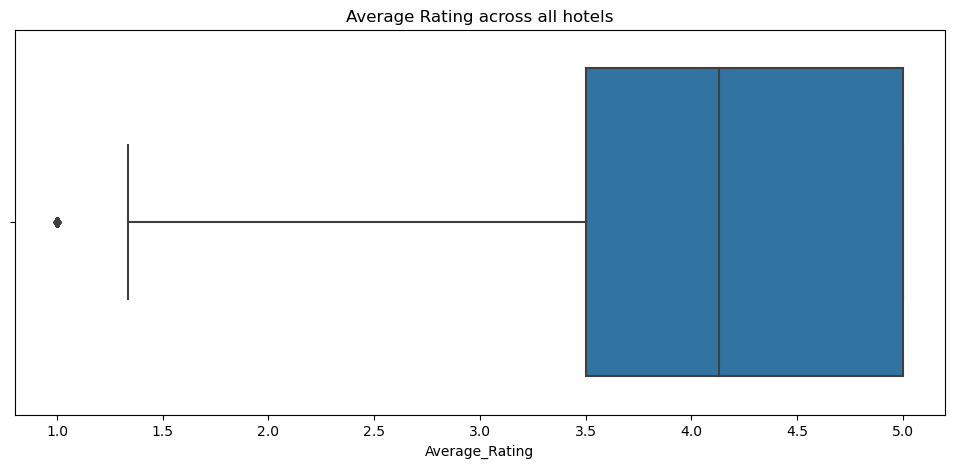

In [46]:
# Plotting Distribution of Hotels based on their ratings
data_ratings = final_combined_data[["name","reviews.rating"]]
ratings_sorted = data_ratings.groupby("name").mean().reset_index().sort_values(by = "reviews.rating")
ratings_sorted.columns = ["Name", "Average_Rating"]
rating_groups = ratings_sorted["Average_Rating"].apply(lambda x: str(math.floor(x)))
ratings_sorted["group"] = rating_groups
print(ratings_sorted)

plt.figure(figsize = (12,5))
plt.title("Average Rating across all hotels")
sns.boxplot(data=ratings_sorted, x = "Average_Rating")
plt.show()


## Frequency of Hotels with *x* number of reviews

                                     Name  Average_Rating group  Count
1517         Hyatt House Seattle/Downtown        4.317073     4    205
799   Metro Points Hotel-Washington North        3.672043     3    186
1441     The Westin Las Vegas Hotel & Spa        4.202924     4    171
807              Best Western Springfield        3.725490     3    153
734               Best Western Seven Seas        3.582781     3    151
...                                   ...             ...   ...    ...
405         Home-Towne Suites Clarksville        3.000000     3      1
404                 Oxford Inn Silverdale        3.000000     3      1
401    Homewood Suites By Hilton Columbus        3.000000     3      1
400                      Boon Hotel & Spa        3.000000     3      1
0                11th Avenue Hotel Hostel        1.000000     1      1

[2755 rows x 4 columns]


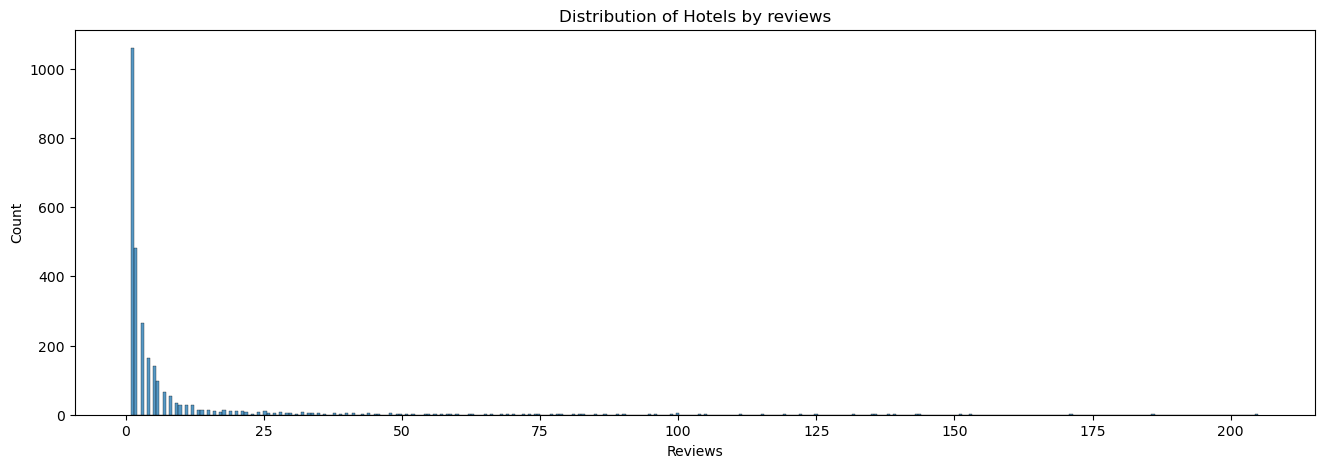

In [47]:
data_ratings = final_combined_data[["name","reviews.rating"]]
review_counts_sorted = data_ratings.groupby("name").count().reset_index().sort_values(by = "reviews.rating",ascending = False)
review_counts_sorted.columns = ["Name", "Count"]

rating_counts = ratings_sorted.merge(review_counts_sorted, on = "Name")
print(rating_counts.sort_values(by = "Count", ascending = False))


plt.figure(figsize = (16,5))
sns.histplot(data= rating_counts, x = "Count")
plt.xlabel("Reviews")
plt.title("Distribution of Hotels by reviews")
plt.show()

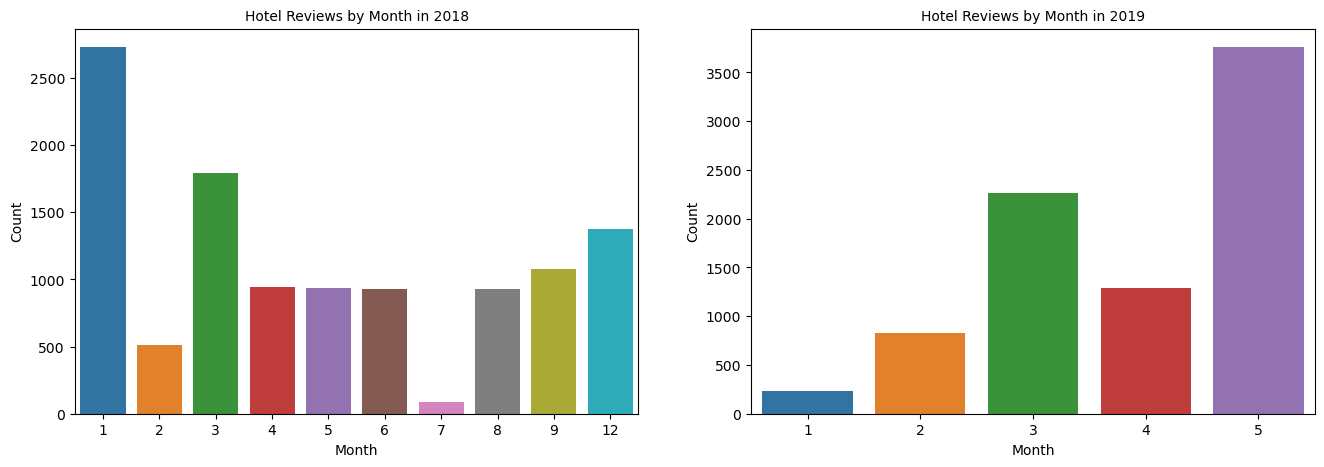

In [48]:
data_dates = final_combined_data[["dateUpdated","reviews.rating"]]
data_dates["month"] = data_dates["dateUpdated"].apply(lambda x: x.month)
data_dates["year"] = data_dates["dateUpdated"].apply(lambda x: x.year)

review_counts_date = data_dates.groupby(["year","month"]).size().reset_index(name = "Count").sort_values(by = "year")
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.barplot(data= review_counts_date[review_counts_date["year"] == 2018], x = "month", y = "Count")
plt.xlabel("Month")
plt.title("Hotel Reviews by Month in 2018", fontsize= 10)

plt.subplot(1,2,2)
sns.barplot(data= review_counts_date[review_counts_date["year"] == 2019], x = "month", y = "Count")
plt.xlabel("Month")
plt.title("Hotel Reviews by Month in 2019", fontsize= 10)


plt.show()

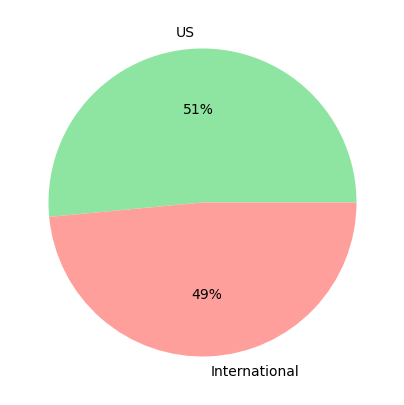

In [53]:
plt.figure(figsize = (16,5))
customer_segment = list(final_combined_data["is_state"].value_counts())
labels = ["US", "International"]
colors = sns.color_palette('pastel')[2:4]
plt.pie(customer_segment, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

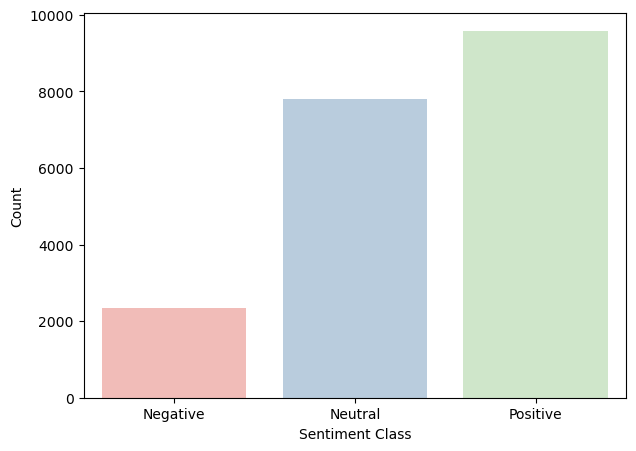

In [59]:
data_ratings = final_combined_data[["name","ratingCategory"]]
ratings_cat_count = data_ratings.groupby("ratingCategory").size().reset_index(name = "Count").sort_values(by = "Count")
ratings_cat_count["ratingCategory"] = ratings_cat_count["ratingCategory"].apply(lambda x: "Negative" if x == 0.0\
                                                                            else ("Neutral" if x == 1.0\
                                                                            else ("Positive")))
#print(ratings_cat_count)

plt.figure(figsize = (7,5))
sns.barplot(data = ratings_cat_count, x = "ratingCategory", y= "Count", palette = "Pastel1")
plt.xlabel("Sentiment Class")
plt.show()

In [60]:
# Function to plot the following horizontal stacked barchats
def plot_hbar(df,col1, col2, cmap = None, stacked=False):
    g_by_category = df.groupby(col1)
    cat_col2 = g_by_category[col2].value_counts()
    cat_col2 = cat_col2.unstack()
    cat_col2["sum"] = cat_col2.sum(axis = 1)
    cat_col2.sort_values(by= "sum", inplace= True)
    cat_col2.drop("sum" , axis = 1, inplace = True)
    cat_col2.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    #plt.title("{} vs {}".format(col1,col2), fontsize= 20)
    plt.ylabel('{}'.format(col1), fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)


In [62]:
# Function to plot the following horizontal stacked barchats with values normalised
def plot_hbar_norm(df,col1, col2, cmap = None, stacked=False):
    g_by_category = df.groupby(col1)
    cat_col2 = g_by_category[col2].value_counts()
    cat_col2 = cat_col2.unstack()
    cat_col2["sum"] = cat_col2.sum(axis = 1)
    cat_col2.sort_values(by= "sum", inplace= True)
    cat_col2["0_norm"] = cat_col2[0.0] / cat_col2["sum"]
    cat_col2["1_norm"] = cat_col2[1.0] / cat_col2["sum"]
    cat_col2["2_norm"] = cat_col2[2.0] / cat_col2["sum"]
    cat_col2.drop([0.0, 1.0, 2.0, "sum"] , axis = 1, inplace = True)
    cat_col2.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    #plt.title("{} vs {}".format(col1,col2), fontsize= 20)
    plt.ylabel('{}'.format(col1), fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)


## Frequency of reviews of hotels across the major cities with respect to the hotels ratings (Normalised)

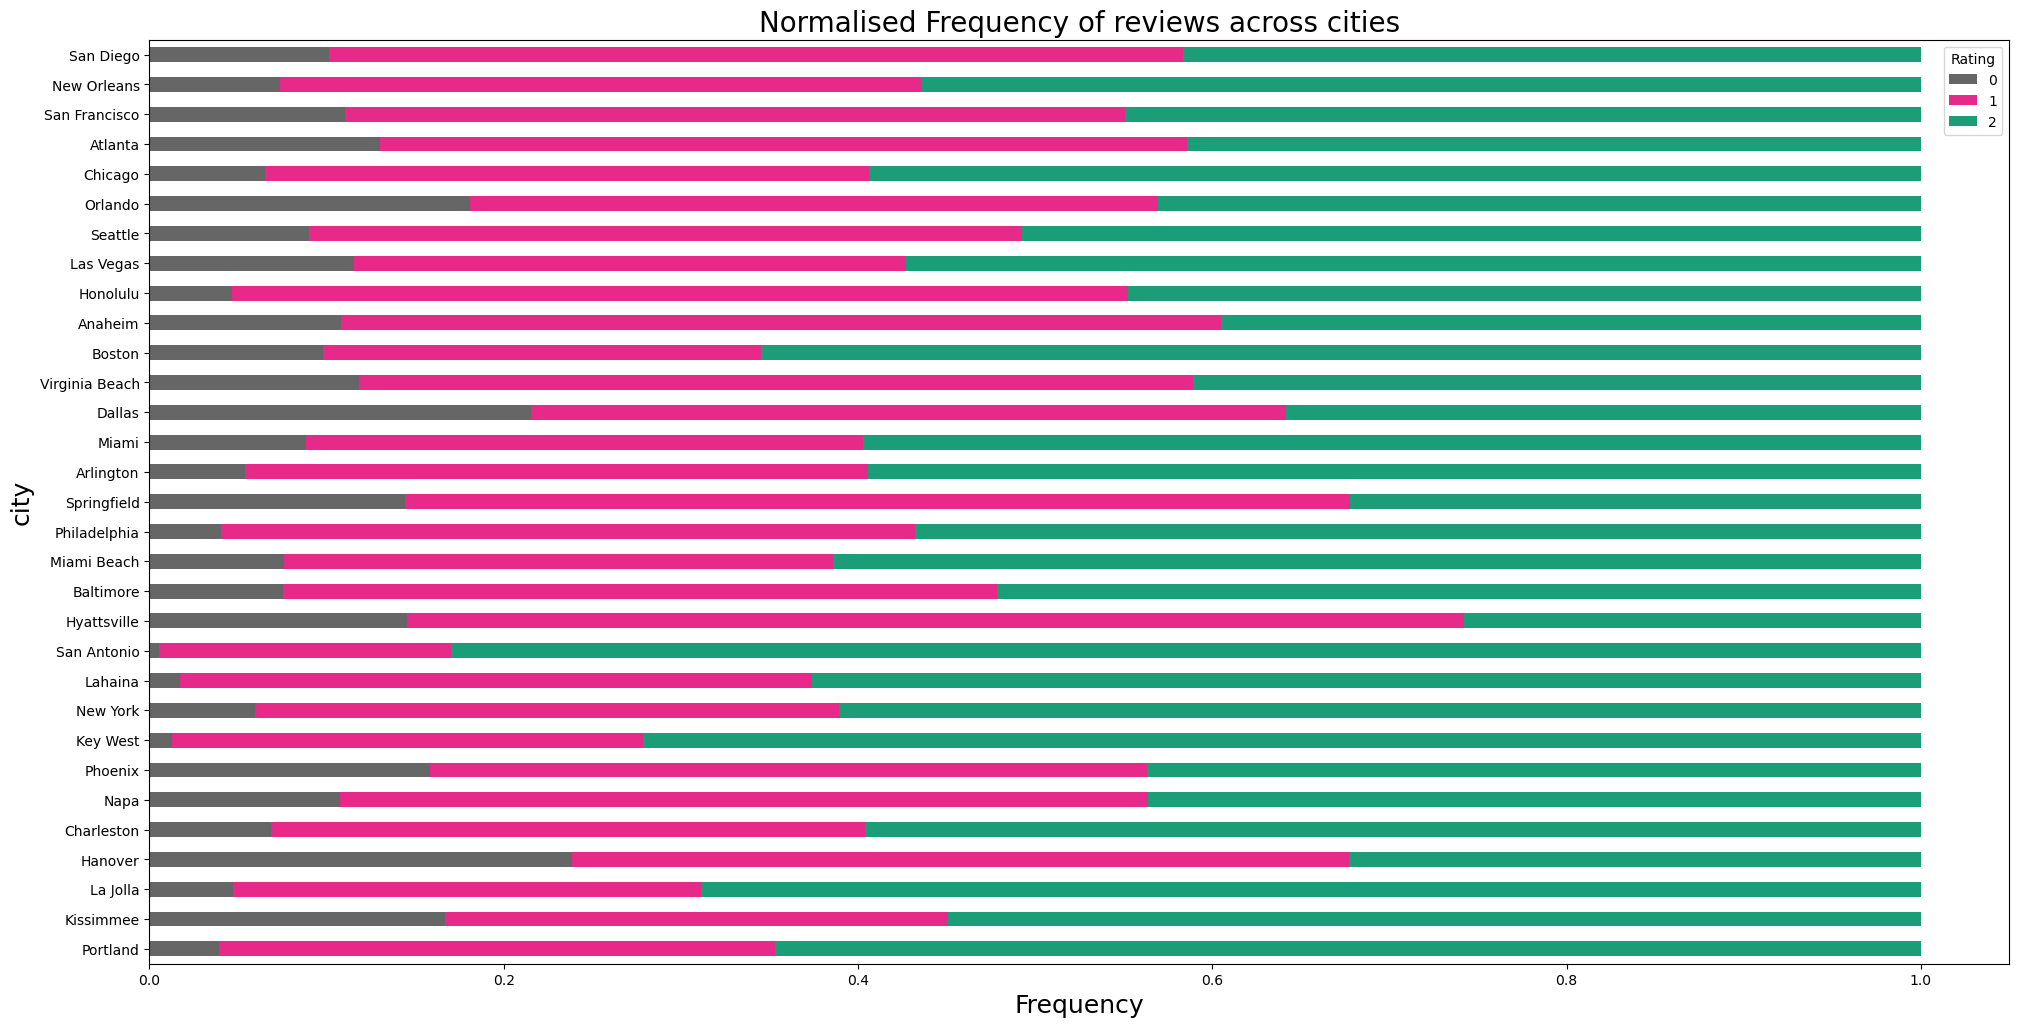

In [63]:
# Plotting the frequency of reviews of hotels across the major cities with respect to the hotels ratings
major_cities = list(final_combined_data.city.value_counts().loc[lambda x: x > 100].index)
subset_data = final_combined_data[final_combined_data["city"].isin(major_cities)]

plot_hbar_norm(subset_data, "city", "ratingCategory", cmap = "Dark2_r",stacked = True)
plt.title("Normalised Frequency of reviews across cities", fontsize= 20)
plt.legend(["0","1","2" ], title="Rating")

## Frequency of reviews of hotels across the US states with respect to the hotels ratings (Normalised)

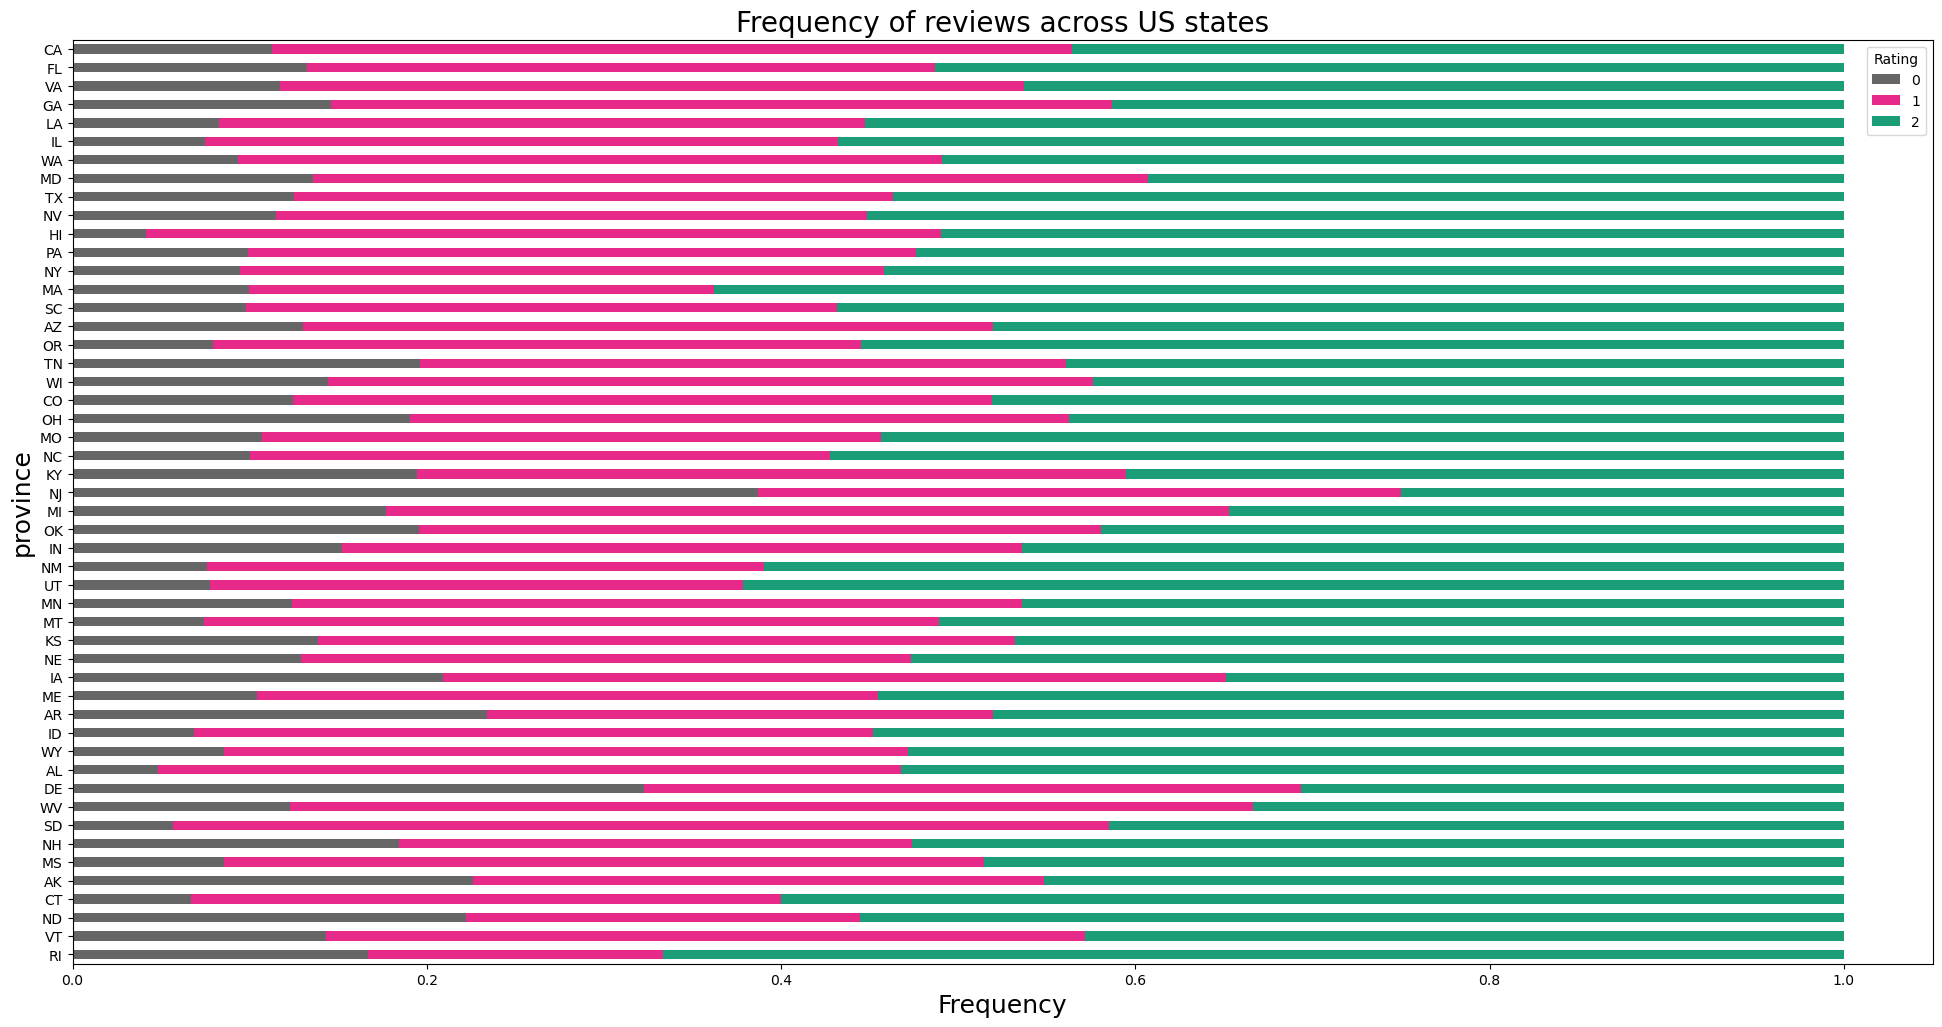

In [64]:
# Plotting the frequency of reviews of hotels across the US states with respect to the hotels ratings
plot_hbar_norm(final_combined_data, "province", "ratingCategory", cmap = "Dark2_r",stacked = True)
plt.title("Frequency of reviews across US states", fontsize= 20)
plt.legend(["0","1", "2"], title="Rating")


## Top 10 Hotel's Customer Segments across US states

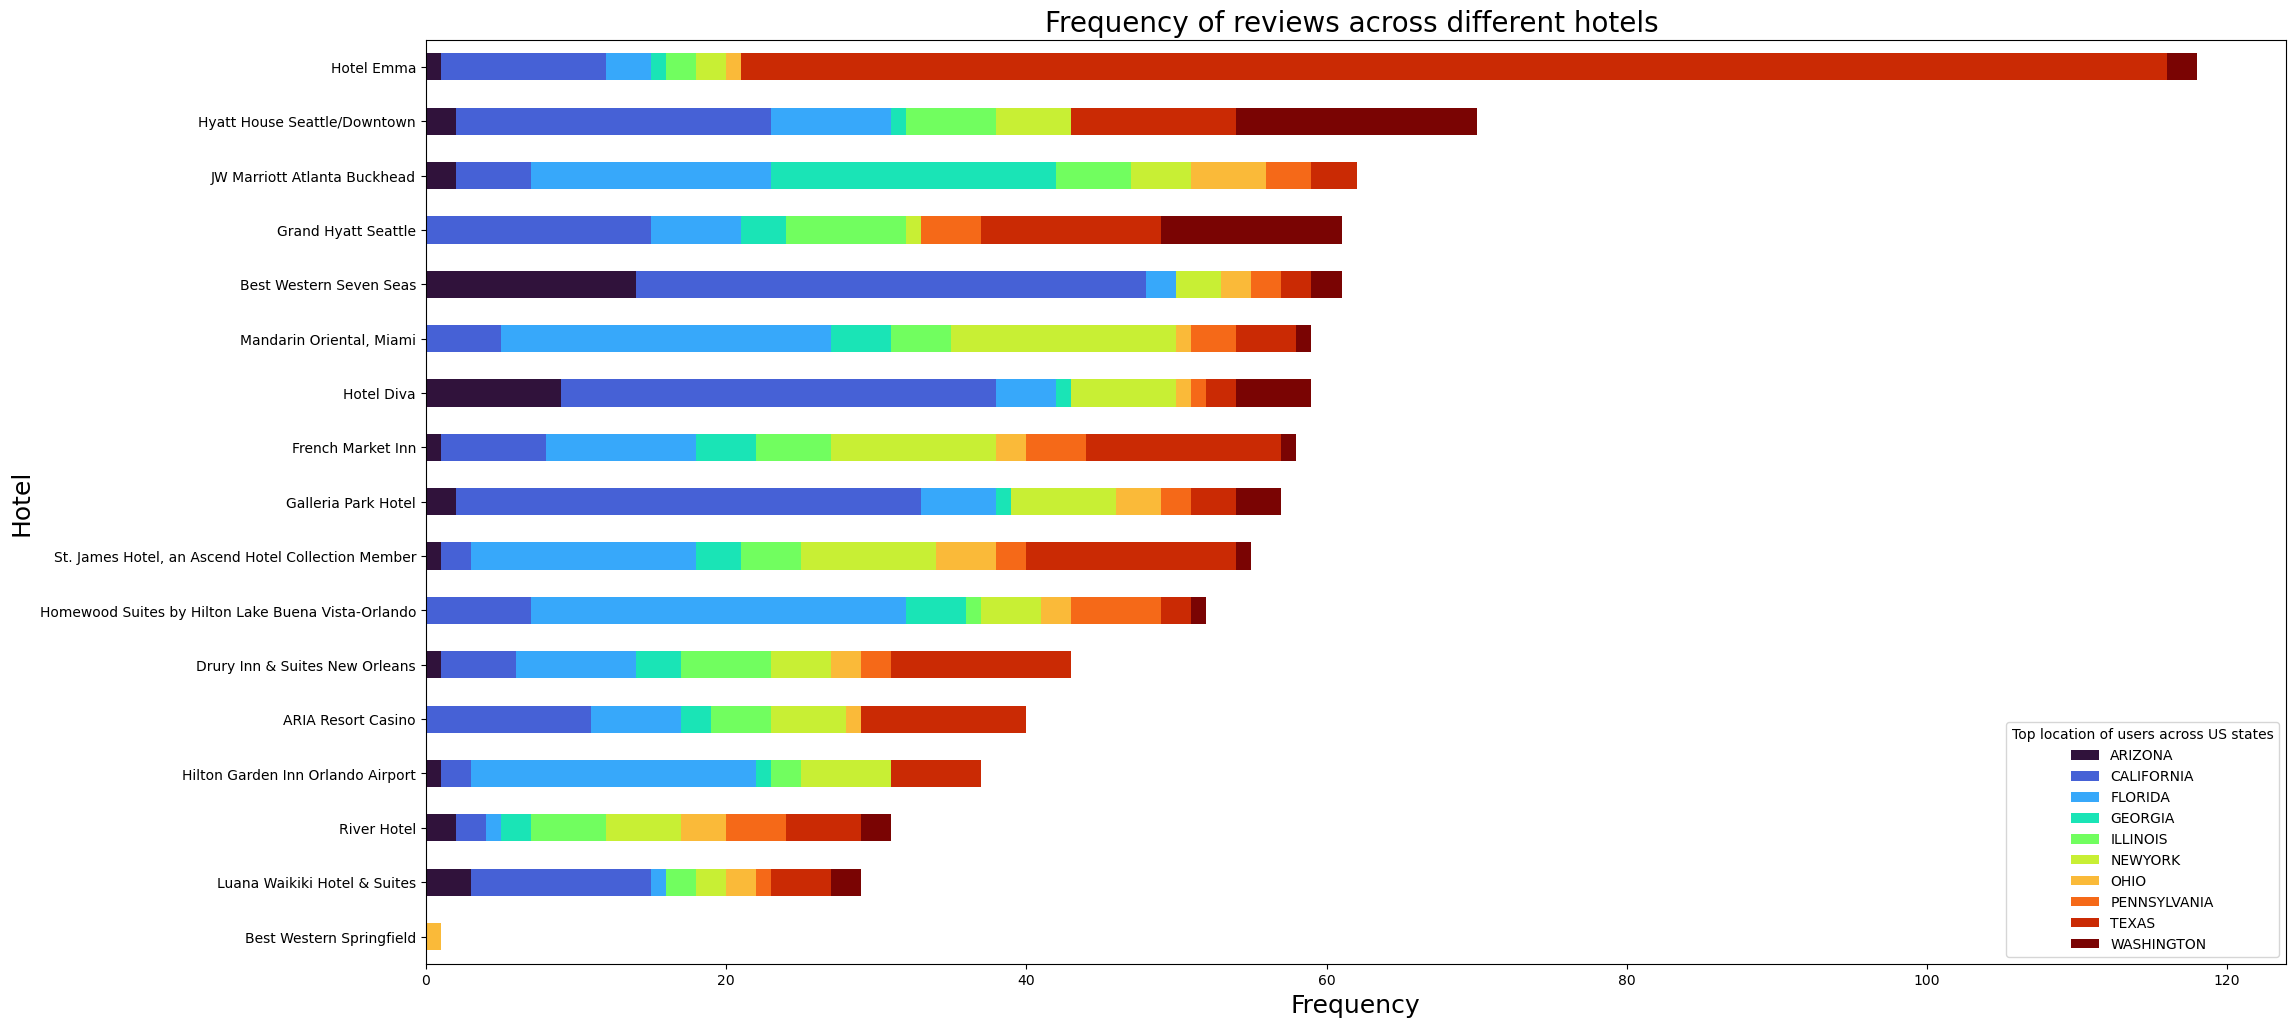

In [65]:
# Plotting chart of the top 10 states where users visited the highly reviewed hotels excluding the Unknown values
major_provinces = list(final_combined_data["userProvince_upper"].value_counts()[1:14].index)
most_reviewed_hotels = list(rating_counts.sort_values(by = "Count", ascending = False)[["Name","Count"]].loc[lambda x: x["Count"] > 100]["Name"])
subset_data = final_combined_data[(final_combined_data["userProvince_upper"].isin(major_provinces)) & (final_combined_data["name"].isin(most_reviewed_hotels)) 
            & (final_combined_data)["is_state"] == 1]

plot_hbar(subset_data, "name", "userProvince_upper", cmap = "turbo",stacked = True)
plt.title("Frequency of reviews across different hotels ", fontsize= 20)
plt.ylabel("Hotel", fontsize = 18)
plt.legend(title="Top location of users across US states")


## Top 10 Hotel's customer segments excluding the United States

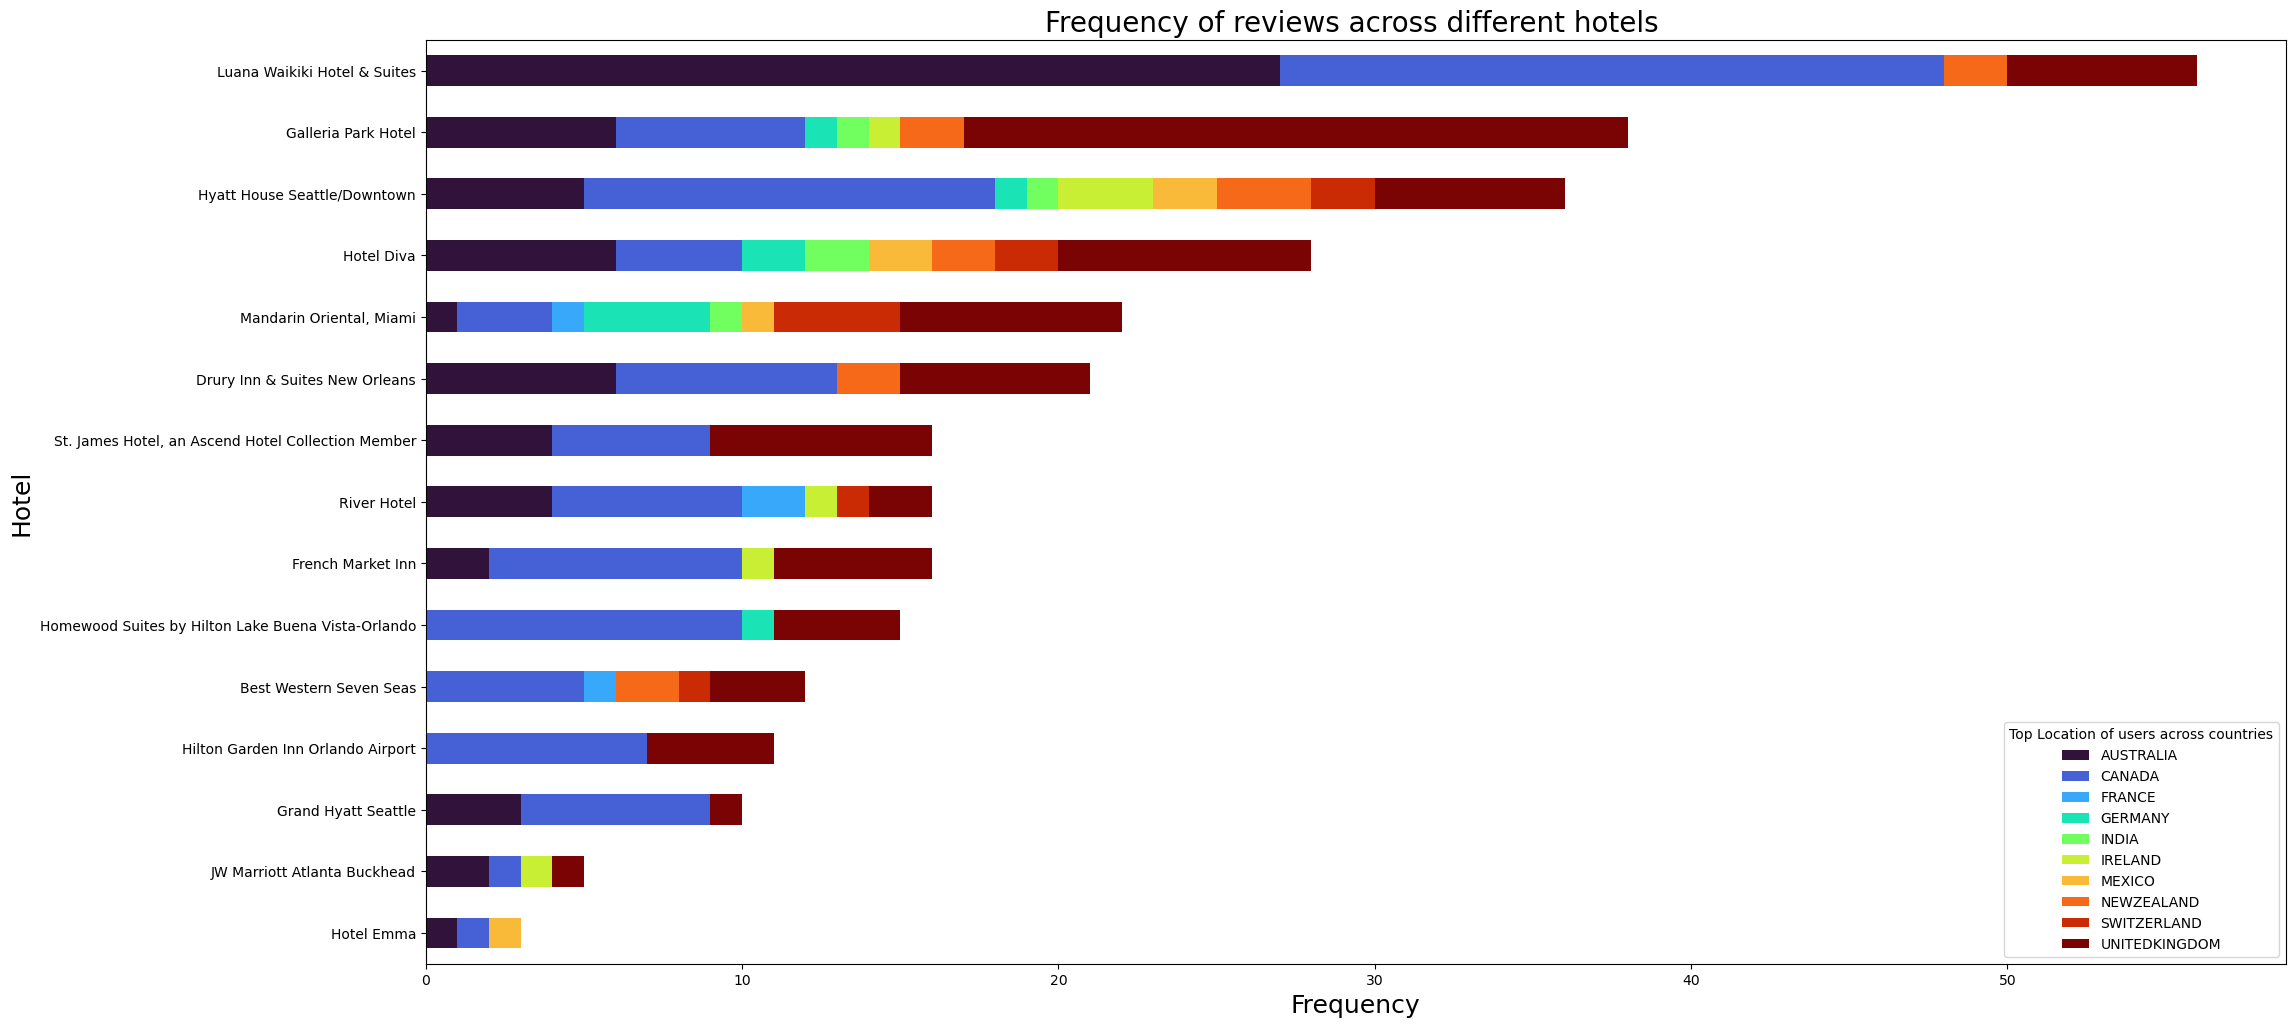

In [66]:
# Plotting chart of the top 10 countries where users visited the highly reviewed hotels excluding the United States and Unknown values
major_countries = list(final_combined_data["user_country"].value_counts()[1:12].index)
most_reviewed_hotels = list(rating_counts.sort_values(by = "Count", ascending = False)[["Name","Count"]].loc[lambda x: x["Count"] > 100]["Name"])
subset_data = final_combined_data[(final_combined_data["user_country"].isin(major_countries)) & (final_combined_data["name"].isin(most_reviewed_hotels)) 
            & (final_combined_data["user_country"] != 'UNKNOWN')]

plot_hbar(subset_data, "name", "user_country", cmap = "turbo",stacked = True)
plt.title("Frequency of reviews across different hotels ", fontsize= 20)
plt.ylabel("Hotel", fontsize = 18)
plt.legend(title="Top Location of users across countries")

## Top 10 States with the most hotel reviews based on the Top 10 states where users stay

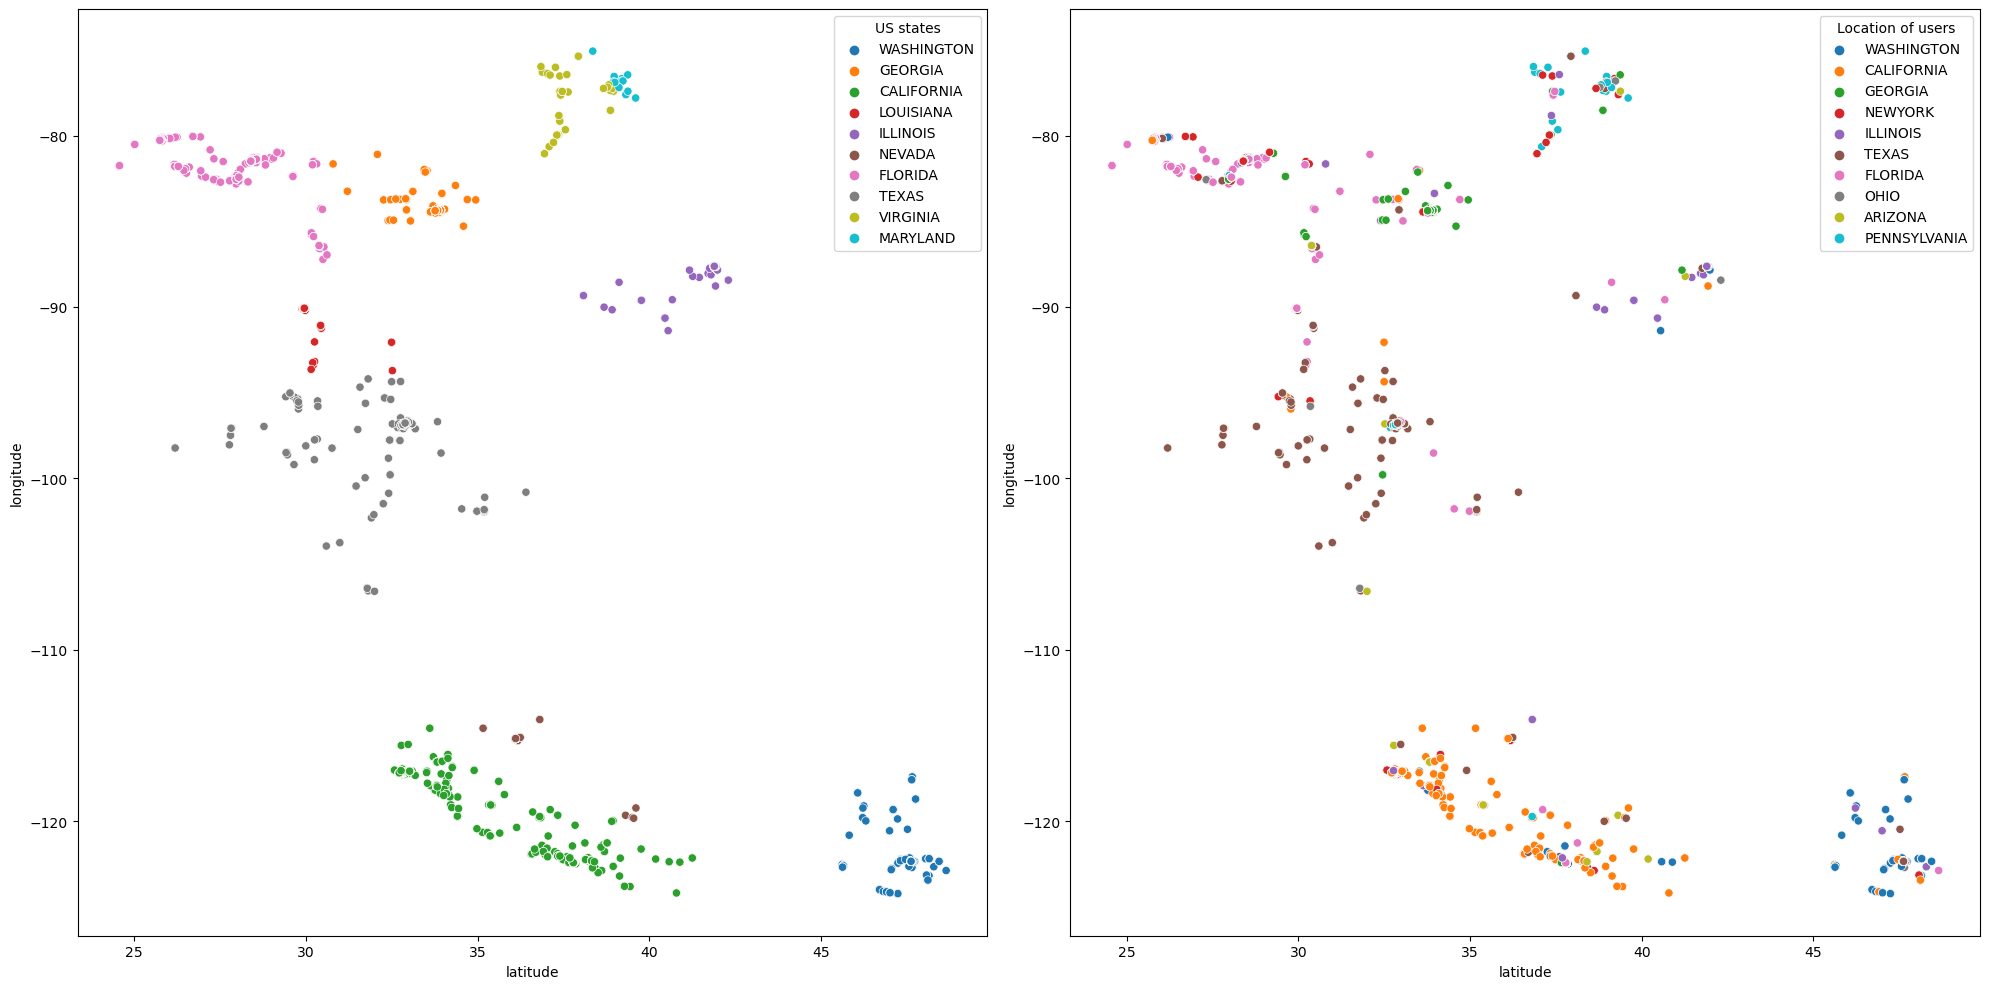

In [67]:
# Top 10 States with the most hotel reviews from the top 10 locations where users stay
final_combined_data["province"] = final_combined_data["province"].apply(lambda row: us_states[row] if row in us_states.keys() else row)
province_upper = [row.upper() for row in final_combined_data["province"]]
final_combined_data["province_upper"] = province_upper
top_10_states = final_combined_data["province_upper"].value_counts()[:10]
states = list(top_10_states.index)
major_provinces = list(final_combined_data["userProvince_upper"].value_counts()[1:14].index)
subset = final_combined_data[(final_combined_data["province_upper"].isin(states)) & (final_combined_data["is_state"] == 1) & (final_combined_data["userProvince_upper"].isin(major_provinces))]

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(data = subset, x = "latitude", y = "longitude", hue = "province_upper", palette = "tab10")
plt.legend(title="US states")


plt.subplot(1,2,2)
sns.scatterplot(data = subset, x = "latitude", y = "longitude", hue = "userProvince_upper", palette = "tab10")
plt.legend(title="Location of users")

plt.tight_layout()
